# Segmentation Using Autoencoders

## 🌟 Overview
![Customer Segmentation Overview](https://miro.medium.com/v2/resize:fit:2000/format:webp/1*o4PXxETRsZV_AjLhOxGk-g.png)

### Problem Statement
In the dynamic world of retail and e-commerce, traditional customer segmentation methods often fall short in unraveling the complex patterns hidden in large-scale customer data. This limitation hampers the development of effective marketing strategies and optimal customer engagement.

### Solution Approach
This notebook introduces a state-of-the-art method for customer segmentation using autoencoders. Unlike conventional techniques, autoencoders allow for an advanced form of dimensionality reduction, facilitating a more nuanced and insightful clustering of customers. This approach helps in identifying distinct customer segments based on deep data features, enabling highly personalized marketing strategies.

### Objectives
- **Advanced Dimensionality Reduction:** Apply autoencoders to reduce the complexity of customer data while retaining critical information.
- **Innovative Clustering Technique:** Use the latent space representation provided by the autoencoder for clustering customers, identifying unique segments with shared characteristics.
- **Detailed Cluster Analysis:** Thoroughly analyze each customer segment to understand specific behaviors and preferences.
- **Actionable Marketing Insights:** Utilize the insights gained from clustering to design targeted marketing campaigns and improve customer engagement.

Through this notebook, we aim to achieve a sophisticated understanding of customer segments, leading to improved marketing efficacy and enhanced customer experiences.

---

## 🛠️ Notebook Structure
1. **Libraries & Data Loading:** Setting up the necessary libraries and loading the dataset.
2. **Data Preprocessing:** Preparing and cleaning the data for the autoencoder model.
3. **Principal Component Analysis (PCA):** Initial step in reducing data dimensionality.
4. **Autoencoder for Clustering:** Implementing an autoencoder for customer data compression and latent feature extraction for clustering.
5. **Exploring Autoencoder-based Clusters:** Understanding and interpreting the customer segments derived from the autoencoder's latent space.
6. **Customer Profiling:** Analyzing the characteristics and purchasing habits of each customer segment for targeted marketing.


## 💼 **Libraries & Data Loading**
This section involves loading essential Python libraries and the dataset.


In [4]:
#Importing all required libraries
import pandas as pd
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import colors
from matplotlib.colors import ListedColormap
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
import seaborn as sns
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.layers import *
from tensorflow.keras import Model

In [5]:
#Reading the dataset
data = pd.read_csv('../input/customer-personality-analysis/marketing_campaign.csv',sep='\t',parse_dates=['Dt_Customer'])
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
#Information on features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

* There are missing values in income
* There are some categorical features in our dataset

## 🛠️ **Data Preprocessing**
Data preprocessing is a critical step in the data analysis pipeline. It involves cleaning, transforming, and reducing data to make it suitable for further analysis. This stage addresses missing values, standardizes data formats, and simplifies complex data structures, paving the way for more accurate and insightful analytics.


In [7]:
print(data.Education.value_counts())
#Segmenting Education levels in three groups
data.Education = data.Education.replace({'PhD':'PostGraduation','Master':'PostGraduation','2n Cycle':'UnderGraduation','Basic':'UnderGraduation'})
print('-'*30)
print(data.Education.value_counts())

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
------------------------------
Graduation         1127
PostGraduation      856
UnderGraduation     257
Name: Education, dtype: int64


In [8]:
print(data.Marital_Status.value_counts())
#Segmenting Marital Status in two groups
data.Marital_Status = data.Marital_Status.replace({'Married':'Together','Single':'Alone','Divorced':'Alone','Widow':'Alone','Absurd':'Alone','YOLO':'Alone'})
print('-'*40)
print(data.Marital_Status.value_counts())

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
----------------------------------------
Together    1444
Alone        796
Name: Marital_Status, dtype: int64


In [9]:
#Drop NA values
data.dropna(inplace=True)
#Dropping the outlier by setting a cap on income
data = data[data.Income<600000]
#Dropping some of the features
data.drop(['ID','Year_Birth','Dt_Customer','Z_CostContact','Z_Revenue'],axis=1,inplace=True)
#New feature for total spendings on various items
data["Spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]
#New feature for total members in the householde
data['Family_Size'] = data.Kidhome + data.Teenhome + data.Marital_Status.replace({'Alone':1,'Together':2})
#Feature pertaining parenthood
data['Is_Parent'] = np.where((data.Kidhome + data.Teenhome)>0,1,0)
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spent,Family_Size,Is_Parent
0,Graduation,Alone,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,1,1617,1,0
1,Graduation,Alone,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,0,27,3,1
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,0,776,2,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,0,53,3,1
4,PostGraduation,Together,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,0,422,3,1


In [10]:
#Converting the labels into a numeric form so as to convert them into the machine-readable form
label_encoder = LabelEncoder()
for item in ['Education','Marital_Status']:
    data[item] = data[[item]].apply(label_encoder.fit_transform)
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spent,Family_Size,Is_Parent
0,0,0,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,1,1617,1,0
1,0,0,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,0,27,3,1
2,0,1,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,0,776,2,0
3,0,1,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,0,53,3,1
4,1,1,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,0,422,3,1


In [11]:
#Standardizes a feature by subtracting the mean and then scaling to unit variance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[-0.89455036, -1.34835684,  0.28660409, ...,  1.67501109,
        -1.75815323, -1.58088903],
       [-0.89455036, -1.34835684, -0.26140705, ..., -0.96272705,
         0.45013109,  0.63255547],
       [-0.89455036,  0.74164344,  0.91272331, ...,  0.2798301 ,
        -0.65401107, -1.58088903],
       ...,
       [-0.89455036, -1.34835684,  0.2328438 , ...,  1.05124409,
        -1.75815323, -1.58088903],
       [ 0.56883889,  0.74164344,  0.80269361, ...,  0.39098007,
         0.45013109,  0.63255547],
       [ 0.56883889,  0.74164344,  0.0417787 , ..., -0.7221786 ,
         1.55427326,  0.63255547]])

## 📉 **Principal Component Analysis (PCA)**
PCA is employed to reduce the dimensionality of the dataset. It's a statistical technique that converts a set of observations with possibly correlated features into a dataset of linearly uncorrelated features called principal components. This reduction in complexity can reveal hidden patterns in the data and significantly improves the efficiency of our analysis and machine learning models.


In [12]:
#Transformation of data
pca = PCA(n_components=3)
pca_data = pd.DataFrame(pca.fit_transform(scaled_data),columns=['pca1', 'pca2', 'pca3'])
pca_data.head()

,pca1,pca2,pca3
0,4.658543,-0.864419,-0.186152
1,-2.683831,-0.473533,-0.092050
2,2.088131,-0.502727,-1.115640
3,-2.729011,-0.828009,-0.026779
4,-0.713792,0.668439,-0.780875


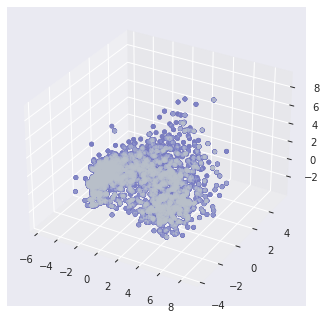

In [15]:
#Plotting the reduced data
ax = plt.axes(projection='3d')
for color in ['black', 'blue', '#B9C0C9']:
    n = 2340
    x, y = np.random.rand(2, n)
    scale = 200.0 * np.random.rand(n)
    ax.scatter3D(pca_data['pca1'],pca_data['pca2'],pca_data['pca3'],c=color,marker='o');

## 🤖 **Autoencoder for Dimensionality Reduction**

Here, we utilize an autoencoder, a type of artificial neural network, to further compress the dataset into a lower-dimensional space. Autoencoders are designed to minimize reconstruction errors, learning efficient data codings in an unsupervised manner. This step is crucial for capturing the essence of our dataset with minimal information loss.
![Autoencoder Architecture](https://www.assemblyai.com/blog/content/images/2022/01/autoencoder_architecture.png)

In [16]:
#Input Lyer
input_df = Input(shape =(data.shape[1],))
#Encoding
x = Dense(500, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu')(x)
x = Dense(2000, activation = 'relu')(x)
#Decoding
encoded = Dense(2000, activation = 'relu')(x)
x = Dense(500, activation = 'relu')(encoded)
x = Dense(500, activation = 'relu')(x)
#Output Layer
decoded = Dense(data.shape[1])(x)

#autoencoder
autoencoder = Model(input_df, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')


User settings:

   KMP_AFFINITY=granularity=fine,noverbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER

An autoencoder is a regression task where the network is asked to predict its input. These networks has a tight bottleneck of a few neurons in the middle, forcing them to create effective representations that compress the input into a low dimensional code that can be used by the decoder to reproduce the original input.

In [17]:
autoencoder.fit(data,data,batch_size=128,epochs=100,verbose=3)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [18]:
encoded_data = autoencoder.predict(scaled_data)

## 🌐 **Clustering Analysis**
In this section, we apply clustering techniques to segment the data into distinct groups based on similarities. This unsupervised learning approach helps in identifying hidden patterns and structures within the data, which can be invaluable for targeted marketing, customer segmentation, and other strategic business decisions.


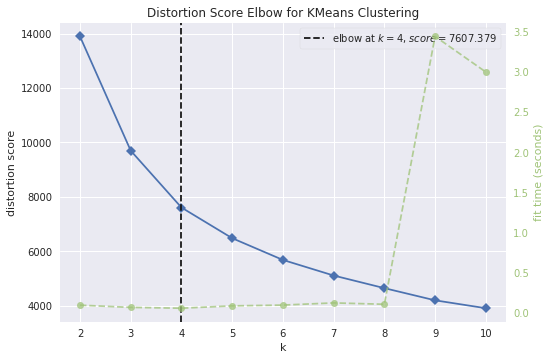

In [19]:
#Elbow method to find numbers of clusters to make
elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(pca_data)
elbow.show();

## 📐 **Elbow Method for Optimal Clusters**
The elbow method is a technique used to determine the optimal number of clusters for K-means clustering. By plotting the variance against the number of clusters, we can identify a point where the rate of decrease sharply changes, resembling an 'elbow'. This point signifies the most appropriate number of clusters for our dataset.


In [20]:
kmeans = KMeans(4)
kmeans.fit(encoded_data)
labels = kmeans.labels_
y = kmeans.fit_predict(scaled_data)
pca_data['Cluster'] = y
#Adding the cluster to original dataset
data['Cluster'] = y

## 🔍 **Examining Cluster Formation**
Without pre-tagged features for evaluation, we explore the formed clusters through visual and statistical analysis. This exploration aims to understand the characteristics and distinct features of each cluster, providing insights into the underlying data distribution and potential group behaviors within our dataset.


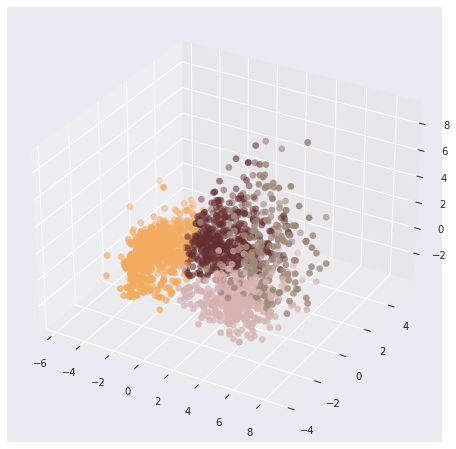

In [21]:
#3-D distribution of the clusters
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter3D(pca_data['pca1'],pca_data['pca2'],pca_data['pca3'],c=pca_data['Cluster'],cmap=cmap,marker='o',s=40);

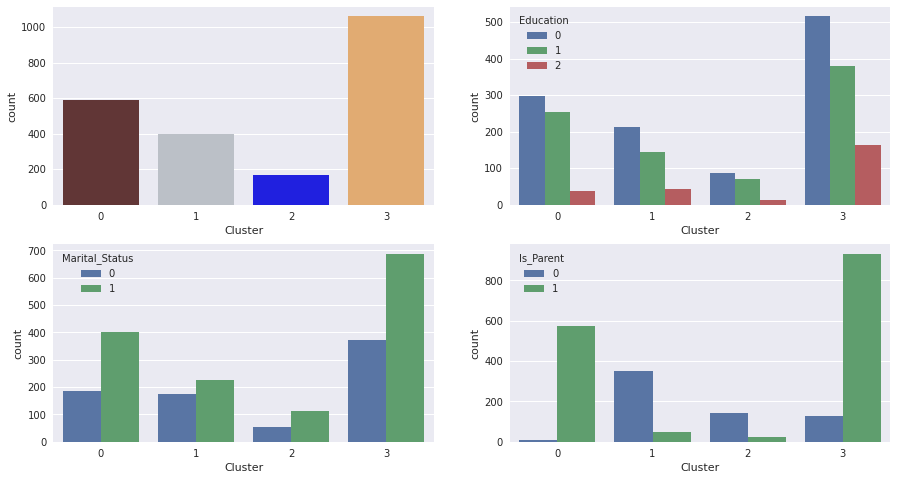

In [22]:
f,ax=plt.subplots(2,2,figsize=(15,8))
sns.countplot('Cluster',data=data,ax=ax[0,0],palette=["#682F2F","#B9C0C9", "blue","#F3AB60"]);
sns.countplot('Cluster',data=data,ax=ax[0,1], hue='Education');
sns.countplot('Cluster',data=data,ax=ax[1,0], hue='Marital_Status');
sns.countplot('Cluster',data=data,ax=ax[1,1], hue='Is_Parent');

## 📊 **Customer Profiling Based on Clusters**
In this final stage, we delve into profiling the identified clusters to understand the characteristics of each segment. Profiling involves analyzing purchasing habits, demographic details, and other relevant aspects of each cluster. This insight is crucial in identifying key customer groups, including the most valuable customers and those requiring more engagement strategies.


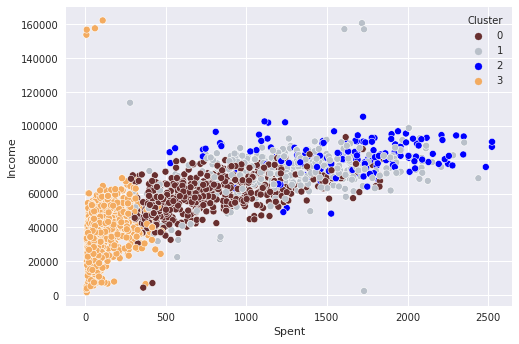

In [23]:
sns.scatterplot(data=data,x='Spent',y='Income',hue='Cluster',palette=["#682F2F","#B9C0C9", "blue","#F3AB60"]);

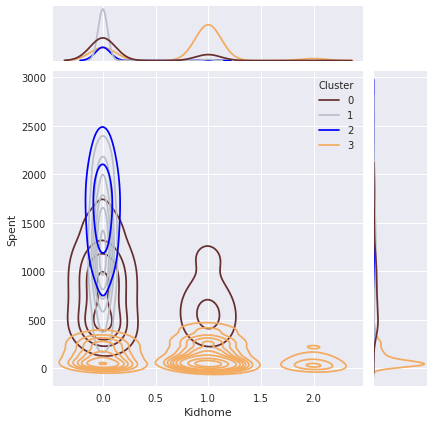

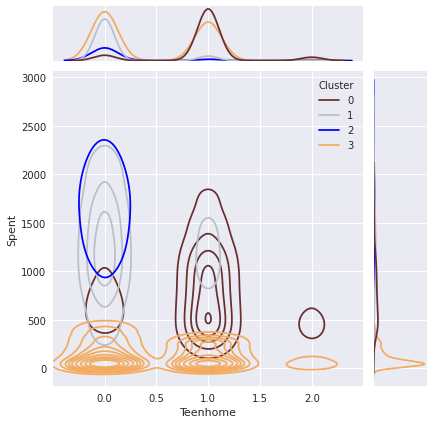

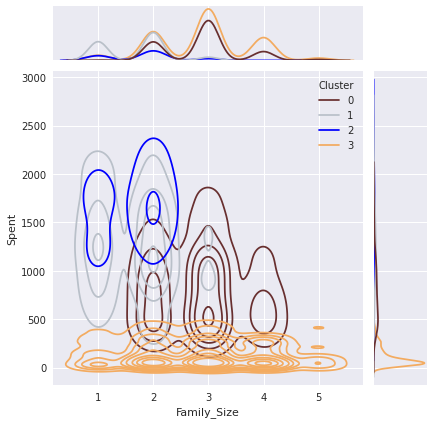

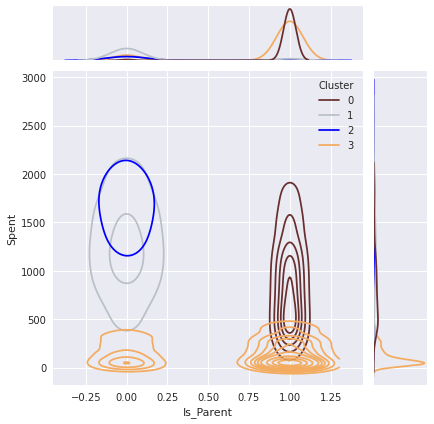

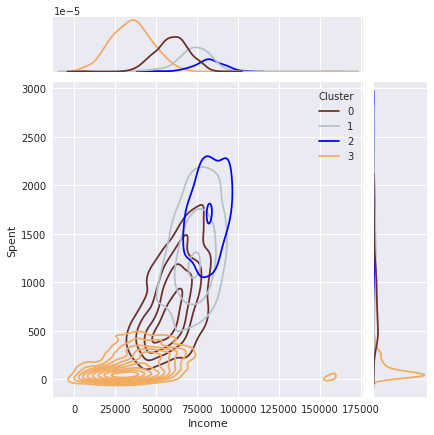

In [24]:
features = ["Kidhome","Teenhome", "Family_Size", "Is_Parent", "Income"]

for item in features:
    sns.jointplot(x=data[item], y=data["Spent"], hue =data["Cluster"], kind="kde", palette=["#682F2F","#B9C0C9", "blue","#F3AB60"]);

## 🧭 Cluster Profiles

### **Cluster 0 - Cautious Spenders with Family Focus**
- **Spending and Income Patterns:** Characterized by low expenditure and low income, this cluster represents a conservative spending group.
- **Family Dynamics:** A significant portion of this cluster are parents, indicating a potential focus on family-oriented products and services.
- **Household Size:** The family size in this cluster typically does not exceed five members, suggesting a preference for products catering to medium-sized families.

### **Cluster 1 - Balanced Moderates**
- **Spending and Income Patterns:** Exhibiting average spending habits and moderate income levels, this cluster reflects a balanced approach to budgeting.
- **Family Dynamics:** Members of this cluster are invariably parents, highlighting a need for diverse family-centric offerings.
- **Household Size:** With a maximum of four members in the family, this group likely includes younger families, possibly with younger children.

### **Cluster 2 - Affluent Independents**
- **Spending and Income Patterns:** This cluster is marked by high spending and high income, indicating a group with significant purchasing power.
- **Family Dynamics:** Predominantly non-parents, suggesting a focus on personal luxury, leisure, and high-end products.
- **Household Size:** Limited to a maximum of two members, this cluster may consist of singles or couples without children, often with more disposable income.

### **Cluster 3 - Aspiring Spenders**
- **Spending and Income Patterns:** Characterized by high spending despite having average income. This group tends to prioritize spending on quality or premium products.
- **Family Dynamics:** Comprising mostly of non-parents, indicating a potential preference for personal indulgence and lifestyle products.
- **Household Size:** With up to three members in the family, this cluster could represent smaller families or couples who prioritize lifestyle and comfort.


